In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("data_from_obesity_db.csv")
df.head()

,id,gender,age,height_m,weight_kg,family_history_with_overweight,high_calorie_intake,vegetable_consumption,daily_meal_count,food_between_meals,smoking_habit,water_consumption,tracks_daily_calories,exercise_frequency,tech_usage_time,alcohol_intake,transportation_used,obesity_level
0,1,Female,21.0,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Remove primary key column 'id' from the DataFrame
df.drop('id', axis=1, inplace=True)

# Remove 'height_m' and 'weight_kg' which are not used in our classification model
df.drop(['height_m', 'weight_kg'], axis=1, inplace=True)

# Display revised DataFrame for review
df.head()

,gender,age,family_history_with_overweight,high_calorie_intake,vegetable_consumption,daily_meal_count,food_between_meals,smoking_habit,water_consumption,tracks_daily_calories,exercise_frequency,tech_usage_time,alcohol_intake,transportation_used,obesity_level
0,Female,21.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Encode categorical features
label_encoder = LabelEncoder()

# Example of encoding gender and obesity_level (you may need to encode other categorical variables similarly)
df['gender'] = label_encoder.fit_transform(df['gender'])  # Female: 0, Male: 1
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({True: 1, False: 0})
df['high_calorie_intake'] = df['high_calorie_intake'].map({True: 1, False: 0})
df['food_between_meals'] = df['food_between_meals'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['smoking_habit'] = df['smoking_habit'].map({True: 1, False: 0})
df['tracks_daily_calories'] = df['tracks_daily_calories'].map({True: 1, False: 0})
df['alcohol_intake'] = df['alcohol_intake'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['transportation_used'] = df['transportation_used'].map({'Automobile': 1, 'Motorbike': 2, 'Bike': 3, 'Public_Transportation': 4, 'Walking': 5})

In [5]:
# Split the data into features and target variable
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create and train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make model predictions
y_pred = model.predict(X_test)

# Calculate accuracy and cross validation accuracy
initial_accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
initial_cv_accuracy = np.mean(cv_scores)

print(f"Model: Random Forest")
print(f"Accuracy: {initial_accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Average CV Accuracy: {initial_cv_accuracy:.4f}")

Model: Random Forest
Accuracy: 0.8486997635933806
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        56
      Normal_Weight       0.68      0.77      0.72        62
     Obesity_Type_I       0.84      0.83      0.84        78
    Obesity_Type_II       0.83      0.95      0.89        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.83      0.71      0.77        56
Overweight_Level_II       0.85      0.70      0.77        50

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.85      0.85      0.85       423

Confusion Matrix:
[[53  2  0  0  0  1  0]
 [ 2 48  5  0  0  4  3]
 [ 0  7 65  4  0  1  1]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  9  3  1  0 40  2]
 [ 1  2  4  6  0  2 35]]
Average CV Accuracy: 0.8519


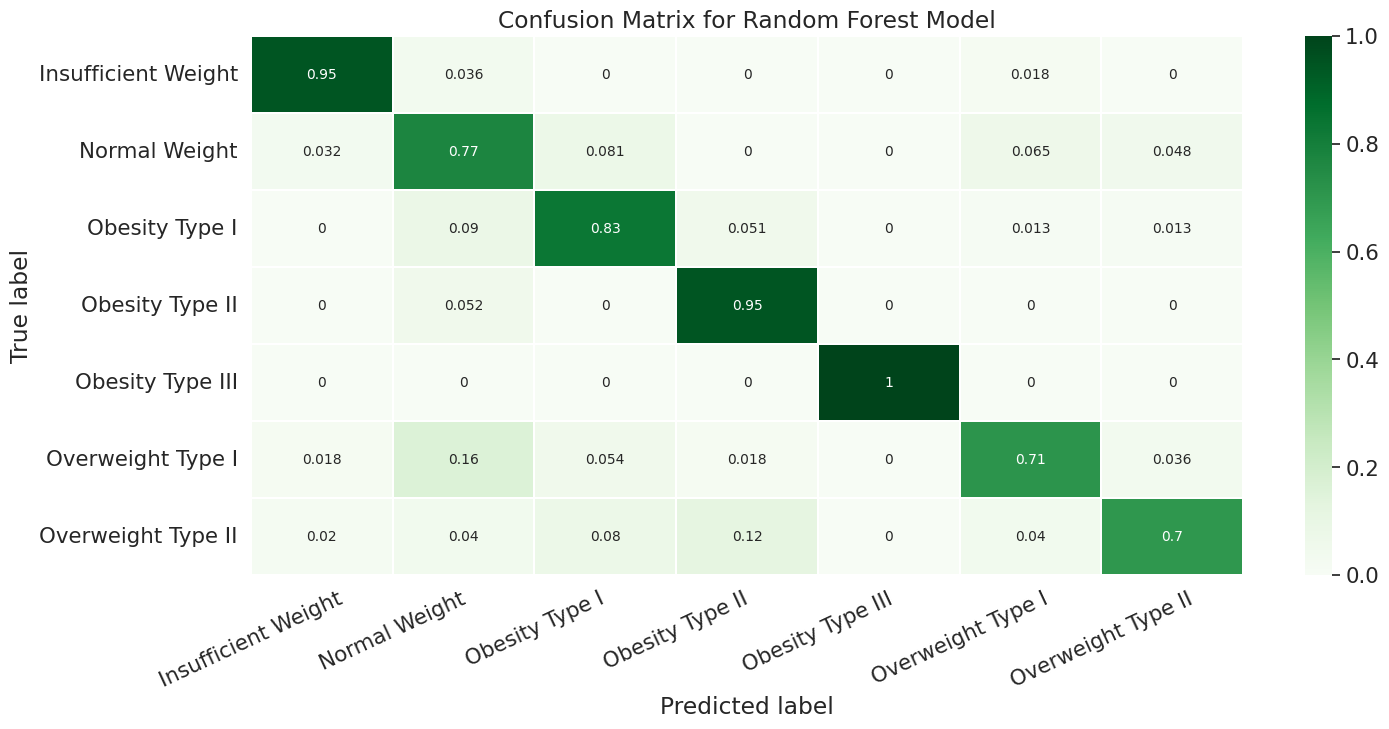

In [7]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

<ipython-input-8-8b335ee71d31>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')


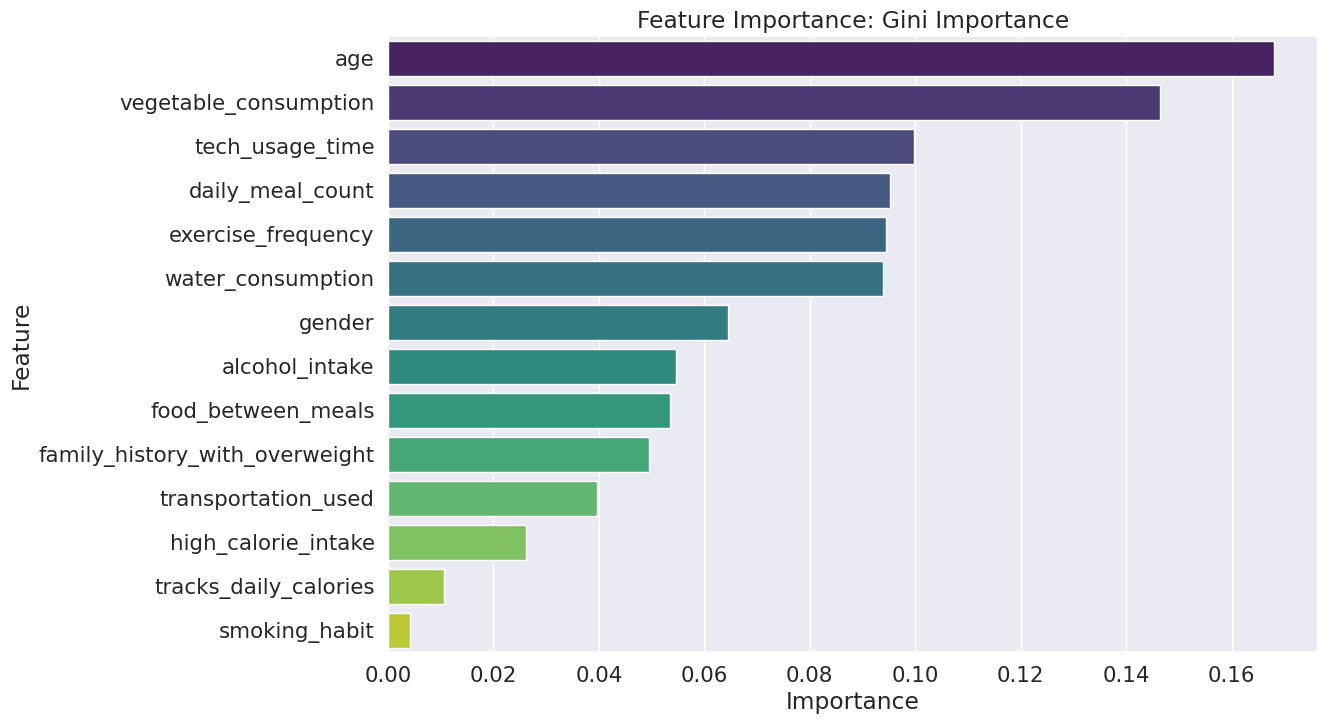

In [8]:
# Plot the feature importance
# Define feature importance variables
feature_names = X.columns
importances = model.feature_importances_

# Create a feature importance plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')
plt.title("Feature Importance: Gini Importance")
plt.show()

# Optimization Attempt 1

In [9]:
# Set revised features variable that removes the two features iwth the lowest importance in the intial model
X_rev1 = df.drop(['obesity_level', 'tracks_daily_calories', 'smoking_habit'], axis=1)

# Split the data into training and testing sets
X_train_rev1, X_test_rev1, y_train_rev1, y_test_rev1 = train_test_split(X_rev1, y, test_size=0.2, random_state=42)

# Create and train Random Forest Classifier - Revision 1
refined_model1 = RandomForestClassifier(random_state=42)
refined_model1.fit(X_train_rev1, y_train_rev1)

# Make model predictions
y_pred_rev1 = refined_model1.predict(X_test_rev1)

# Calculate accuracy and cross validation accuracy
accuracy_rev1 = accuracy_score(y_test_rev1, y_pred_rev1)
cv_scores = cross_val_score(refined_model1, X_train_rev1, y_train_rev1, cv=5, scoring='accuracy')
cv_accuracy_rev1 = np.mean(cv_scores)

print(f"Model: Random Forest - Revision 1")
print(f"Accuracy: {accuracy_rev1}")
print(f"Classification Report:\n{classification_report(y_test_rev1, y_pred_rev1)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_rev1, y_pred_rev1)}")
print(f"Average CV Accuracy: {cv_accuracy_rev1:.4f}")

Model: Random Forest - Revision 1
Accuracy: 0.8368794326241135
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.91      0.89        56
      Normal_Weight       0.68      0.71      0.69        62
     Obesity_Type_I       0.85      0.86      0.85        78
    Obesity_Type_II       0.86      0.95      0.90        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.75      0.70      0.72        56
Overweight_Level_II       0.85      0.70      0.77        50

           accuracy                           0.84       423
          macro avg       0.84      0.83      0.83       423
       weighted avg       0.84      0.84      0.84       423

Confusion Matrix:
[[51  2  0  0  0  3  0]
 [ 4 44  4  0  0  6  4]
 [ 0  5 67  4  0  1  1]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 2  9  4  1  0 39  1]
 [ 2  2  4  4  0  3 35]]
Average CV Accuracy: 0.8513


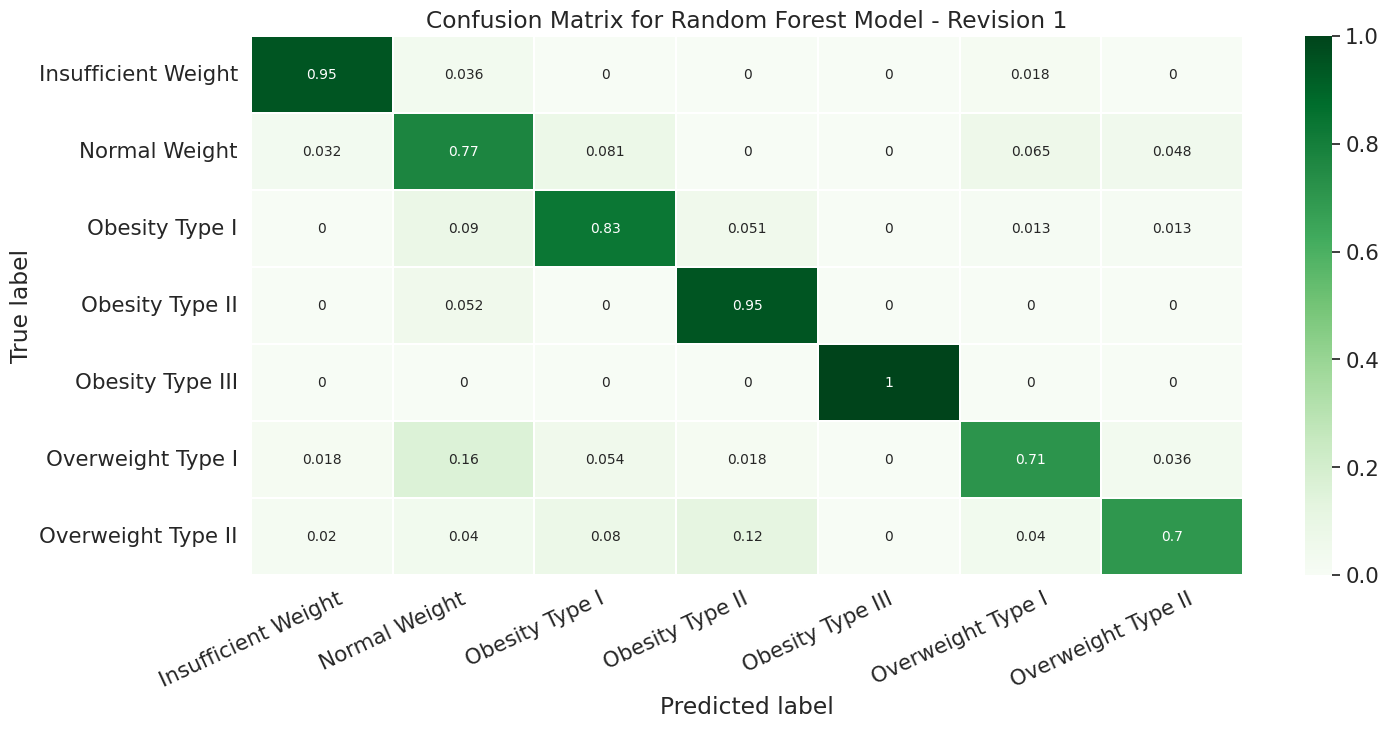

In [10]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - Revision 1')
plt.show()

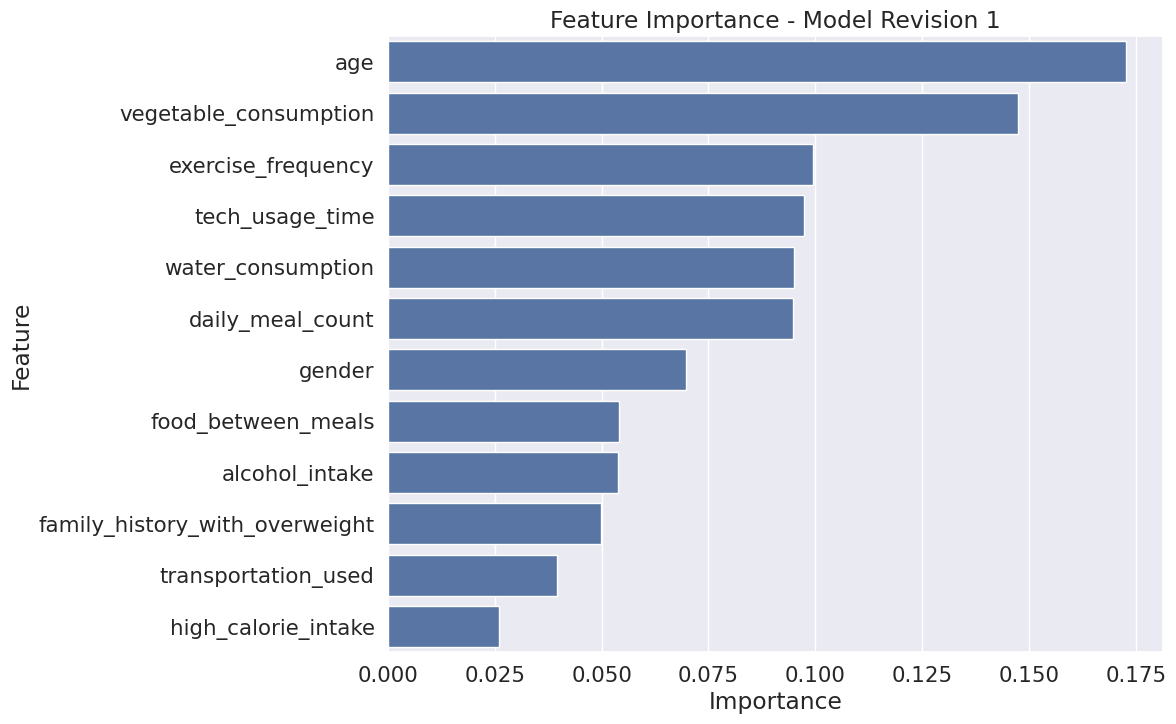

In [11]:
# Plot the feature importance
# Define feature importance variables
feature_names = X_rev1.columns
importances = refined_model1.feature_importances_

# Create a feature importance plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance - Model Revision 1")
plt.show()

# Optimization Attempt 2

In [12]:
# Set revised features variable that removes the three features with the lowest importance in the intial model
X_rev2 = df.drop(['obesity_level', 'tracks_daily_calories', 'smoking_habit', 'high_calorie_intake'], axis=1)

# Split the data into training and testing sets
X_train_rev2, X_test_rev2, y_train_rev2, y_test_rev2 = train_test_split(X_rev2, y, test_size=0.2, random_state=42)

# Create and train Random Forest Classifier - Revision 2
refined_model2 = RandomForestClassifier(random_state=42)
refined_model2.fit(X_train_rev2, y_train_rev2)

# Make model predictions
y_pred_rev2 = refined_model2.predict(X_test_rev2)

# Calculate accuracy and cross validation accuracy
accuracy_rev2 = accuracy_score(y_test_rev2, y_pred_rev2)
cv_scores = cross_val_score(refined_model2, X_train_rev2, y_train_rev2, cv=5, scoring='accuracy')
cv_accuracy_rev2 = np.mean(cv_scores)

print(f"Model: Random Forest - Model Revision 2")
print(f"Accuracy: {accuracy_rev2}")
print(f"Classification Report:\n{classification_report(y_test_rev2, y_pred_rev2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_rev2, y_pred_rev2)}")

print(f"Average CV Accuracy: {cv_accuracy_rev2:.4f}")


Model: Random Forest - Model Revision 2
Accuracy: 0.8132387706855791
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.91      0.88        56
      Normal_Weight       0.65      0.71      0.68        62
     Obesity_Type_I       0.86      0.78      0.82        78
    Obesity_Type_II       0.83      0.95      0.89        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.72      0.70      0.71        56
Overweight_Level_II       0.76      0.62      0.68        50

           accuracy                           0.81       423
          macro avg       0.81      0.81      0.81       423
       weighted avg       0.81      0.81      0.81       423

Confusion Matrix:
[[51  2  0  0  0  3  0]
 [ 4 44  2  1  0  7  4]
 [ 1  7 61  5  0  1  3]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 2 10  2  0  0 39  3]
 [ 2  2  6  5  0  4 31]]
Average CV Accuracy: 0.8436


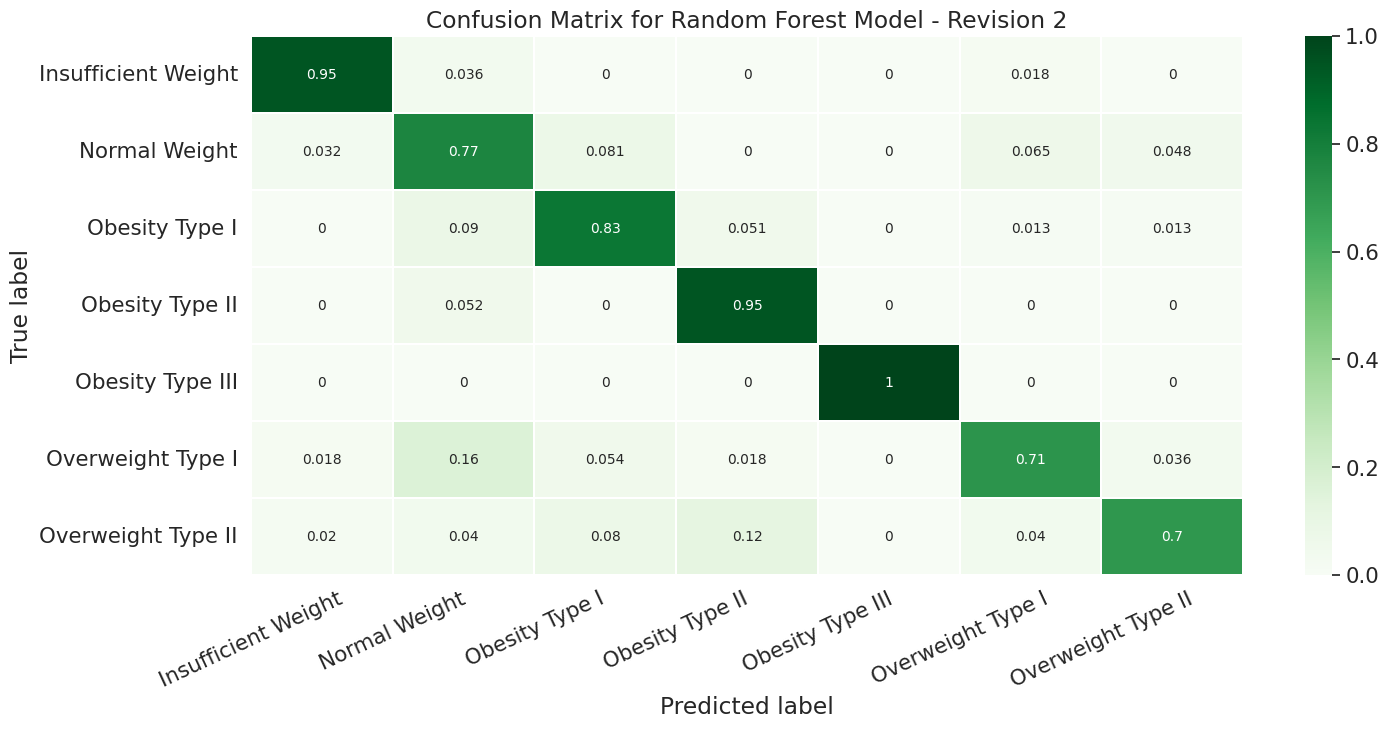

In [13]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - Revision 2')
plt.show()

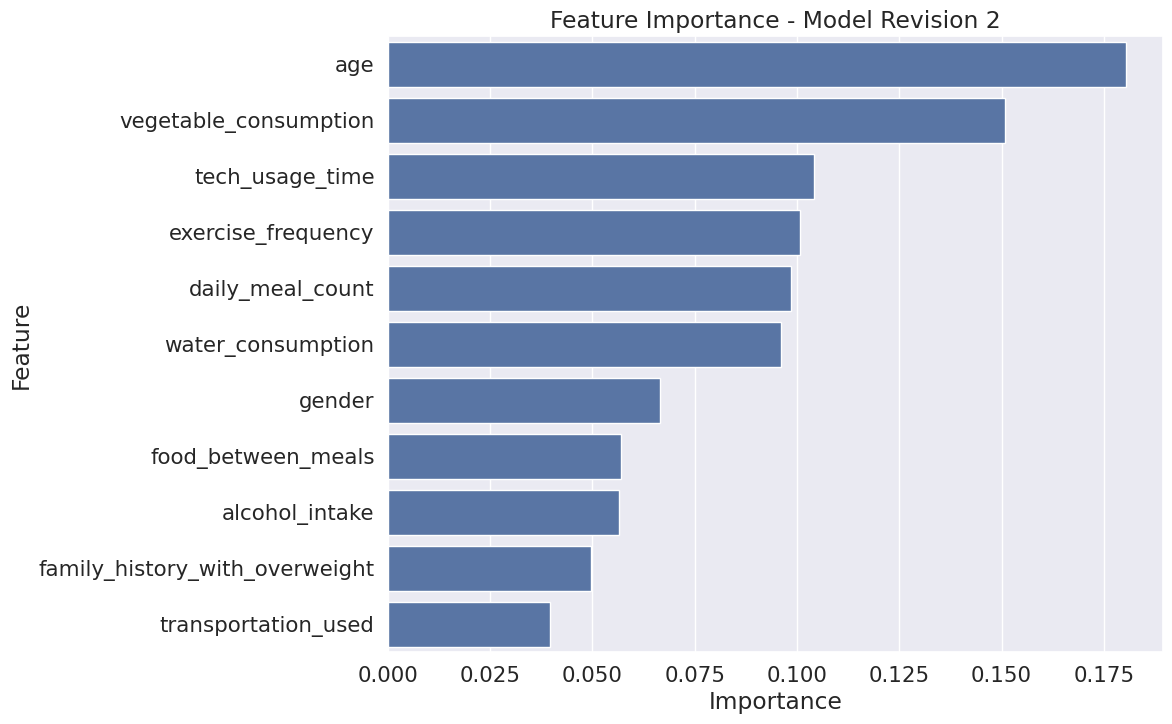

In [14]:
# Define feature importance variables
feature_names = X_rev2.columns
importances = refined_model2.feature_importances_

# Create a feature importance plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance - Model Revision 2")
plt.show()

## Accuracy Comparison Chart of Initial Model and first 2 Optimization Attempts

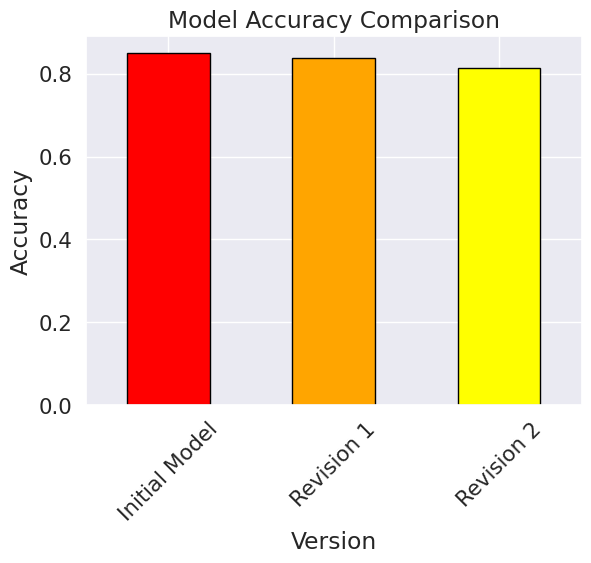

In [15]:
# Chart accuracy comparison between initial model and Revision 1 & 2
# Store accuracy data for initial model and Revision 1 & 2
accuracy_data = {
    'Version': ['Initial Model', 'Revision 1', 'Revision 2'],
    'Accuracy': [initial_accuracy, accuracy_rev1, accuracy_rev2]
}

# Convert accuracy data for initial model and Revision 1 & 2 into a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Plot DataFrame as a barchart
accuracy_df.plot(x='Version', y='Accuracy', kind='bar', color=['red','orange','yellow'], edgecolor='black', legend=False)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

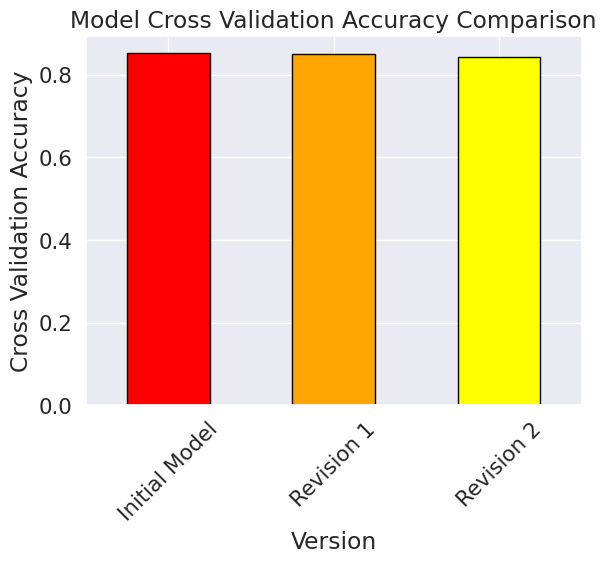

In [16]:
# Chart cross validation accuracy comparison between initial model and Revision 1 & 2
# Store CV accuracy data for initial model and Revision 1 & 2
cv_accuracy_data = {
    'Version': ['Initial Model', 'Revision 1', 'Revision 2'],
    'CV_Accuracy': [initial_cv_accuracy, cv_accuracy_rev1, cv_accuracy_rev2]
}

# Convert CV accuracy data for initial model and Revision 1 & 2 into a DataFrame
cv_accuracy_df = pd.DataFrame(cv_accuracy_data)

# Plot DataFrame as a barchart
cv_accuracy_df.plot(x='Version', y='CV_Accuracy', kind='bar', color=['red','orange','yellow'], edgecolor='black', legend=False)
plt.title('Model Cross Validation Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Cross Validation Accuracy')
plt.show()

# Optimization Attempt #3 - Modify Hyperprameters via GridSearchCV

In [17]:
# Examine hyperparameters of the initial forest model
print("Initial Model Parameters")
model.get_params()


Initial Model Parameters


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [20]:
# Display hyperparamters of the best performing model
rf_random.best_params_

{'n_estimators': 1577,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [21]:
# Define the best performing model (Random Forest Classifier - Revision 3)
refined_model3 = rf_random.best_estimator_

# Make model predictions
y_pred_rev3 = refined_model3.predict(X_test)

# Calculate accuracy and cross validation accuracy
accuracy_rev3 = accuracy_score(y_test, y_pred_rev3)
cv_scores = cross_val_score(refined_model3, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_rev3 = np.mean(cv_scores)

print(f"Model: Random Forest - Revision 3")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rev3)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rev3)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rev3)}")
print(f"Average CV Accuracy: {cv_accuracy_rev3:.4f}")

Model: Random Forest - Revision 3
Accuracy: 0.8699763593380615
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        56
      Normal_Weight       0.71      0.82      0.76        62
     Obesity_Type_I       0.87      0.86      0.86        78
    Obesity_Type_II       0.90      0.95      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.80      0.73      0.77        56
Overweight_Level_II       0.89      0.78      0.83        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423

Confusion Matrix:
[[52  2  0  0  0  2  0]
 [ 1 51  4  0  0  4  2]
 [ 0  6 67  3  0  1  1]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  8  3  1  0 41  2]
 [ 1  2  3  2  0  3 39]]
Average CV Accuracy: 0.8655


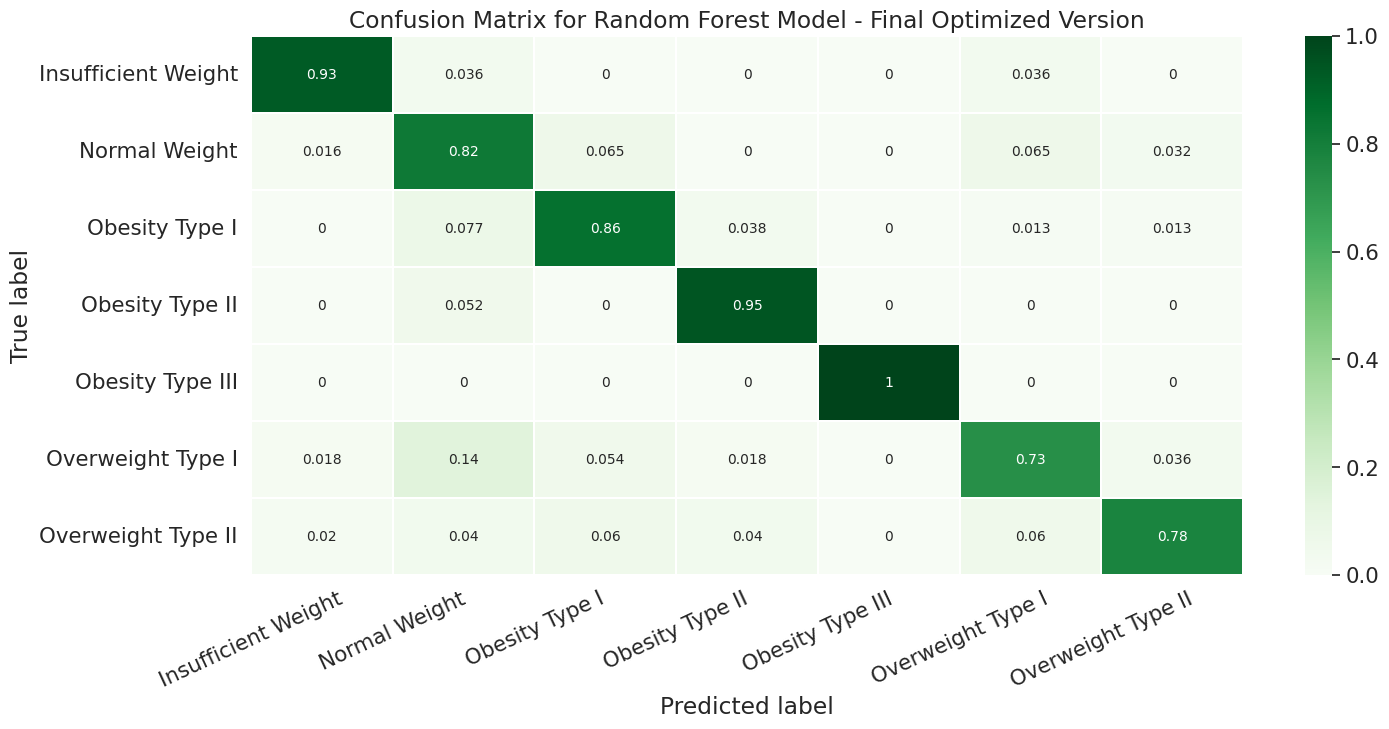

In [22]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rev3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - Final Optimized Version')
plt.show()

<ipython-input-23-16c4c6c156c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')


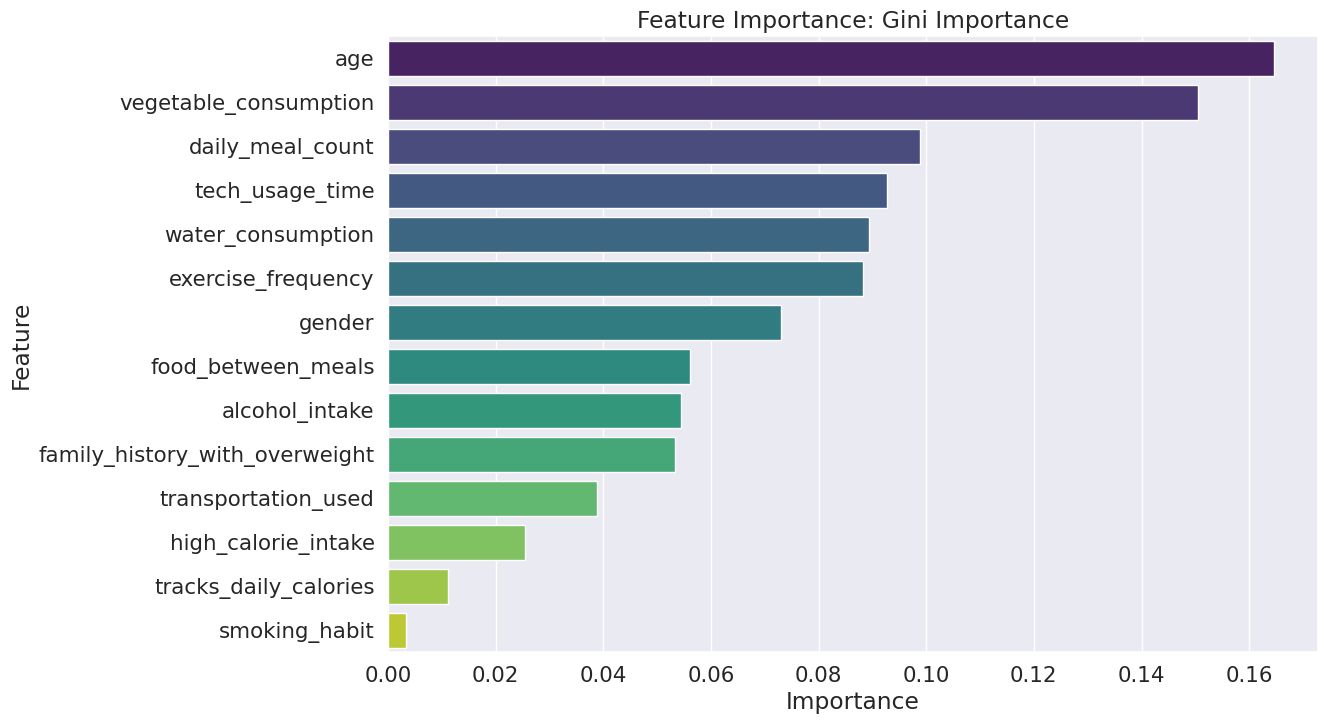

In [23]:
# Define feature importance variables
feature_names = X.columns
importances = rf_random.best_estimator_.feature_importances_

# Create a feature importance plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')
plt.title("Feature Importance: Gini Importance")
plt.show()

In [24]:
# Review the parameters of the final optimized model
print('Revision 3 Model Parameters')
refined_model3.get_params()

Revision 3 Model Parameters


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1577,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Accuracy Comparison Chart of Initial Model and Optimization Attempt 3 (Final)

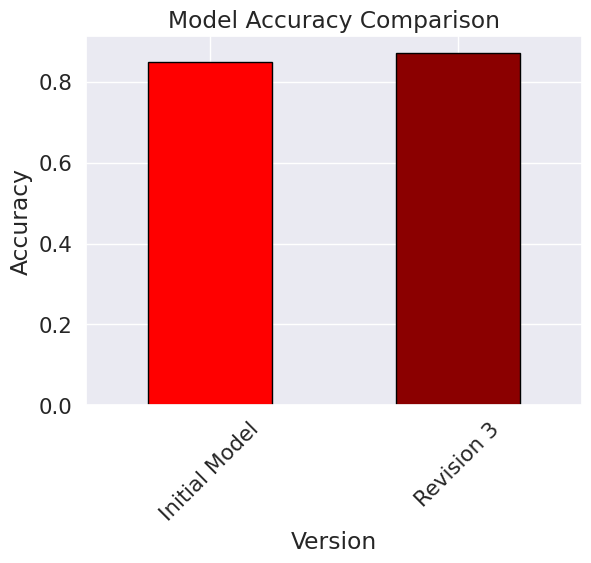

In [25]:
# Chart accuracy comaprison between initial model and Revision 3
# Store accuracy data for initial model and Revision 3
accuracy_data2 = {
    'Version': ['Initial Model', 'Revision 3'],
    'Accuracy': [initial_accuracy, accuracy_rev3]
}

# Convert accuracy data for initial model and Revision 3 into a DataFrame
accuracy_df2 = pd.DataFrame(accuracy_data2)

# Plot DataFrame as a barchart
accuracy_df2.plot(x='Version', y='Accuracy', kind='bar', color=['red','darkred'], edgecolor='black', legend=False)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

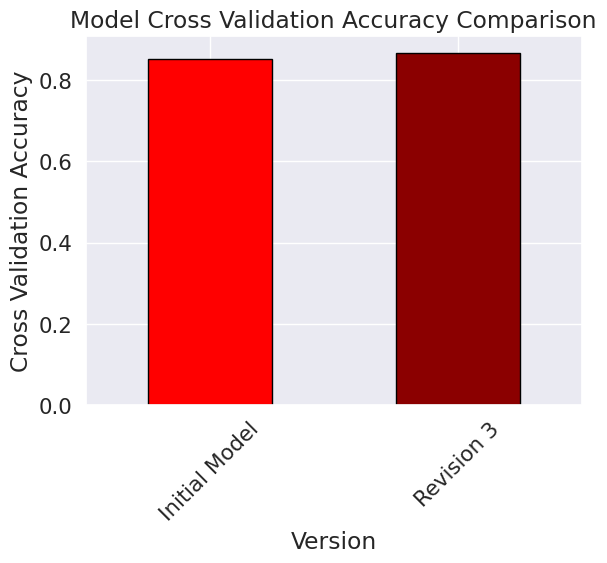

In [26]:
# Chart cross validation accuracy comaprison between initial model and Revision 3
# Store CV accuracy data for initial model and Revision 3
cv_accuracy_data = {
    'Version': ['Initial Model', 'Revision 3'],
    'CV_Accuracy': [initial_cv_accuracy, cv_accuracy_rev3]
}

# Convert CV accuracy data for initial model and Revision 3 into a DataFrame
cv_accuracy_df = pd.DataFrame(cv_accuracy_data)

# Plot DataFrame as a barchart
cv_accuracy_df.plot(x='Version', y='CV_Accuracy', kind='bar', color=['red','darkred'], edgecolor='black', legend=False)
plt.title('Model Cross Validation Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Cross Validation Accuracy')
plt.show()

# Results of the Final Model (Revision 3)

In [27]:
print(f"Model: Random Forest - Revision 3")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rev3)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rev3)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rev3)}")
print(f"Average CV Accuracy: {cv_accuracy_rev3:.4f}")

Model: Random Forest - Revision 3
Accuracy: 0.8699763593380615
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        56
      Normal_Weight       0.71      0.82      0.76        62
     Obesity_Type_I       0.87      0.86      0.86        78
    Obesity_Type_II       0.90      0.95      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.80      0.73      0.77        56
Overweight_Level_II       0.89      0.78      0.83        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423

Confusion Matrix:
[[52  2  0  0  0  2  0]
 [ 1 51  4  0  0  4  2]
 [ 0  6 67  3  0  1  1]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  8  3  1  0 41  2]
 [ 1  2  3  2  0  3 39]]
Average CV Accuracy: 0.8655


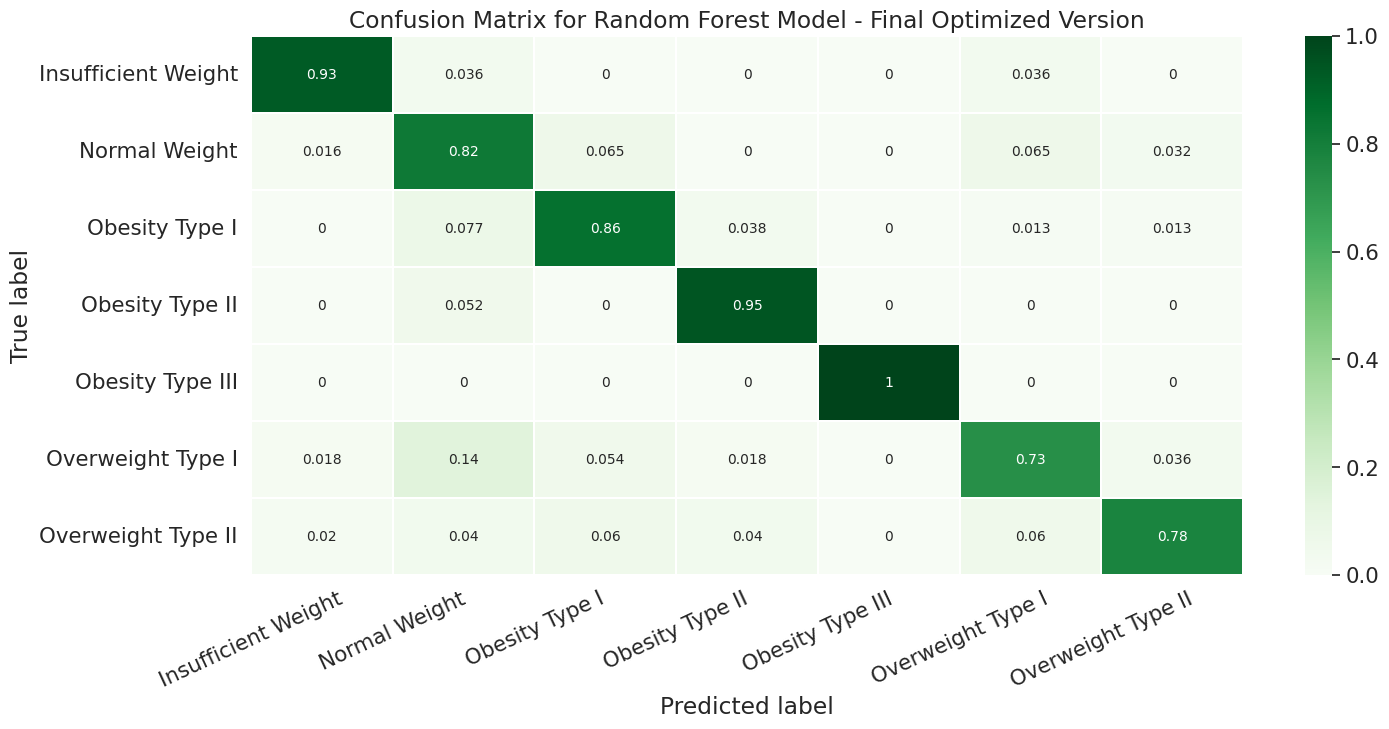

In [28]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rev3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - Final Optimized Version')
plt.show()

<ipython-input-29-16c4c6c156c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')


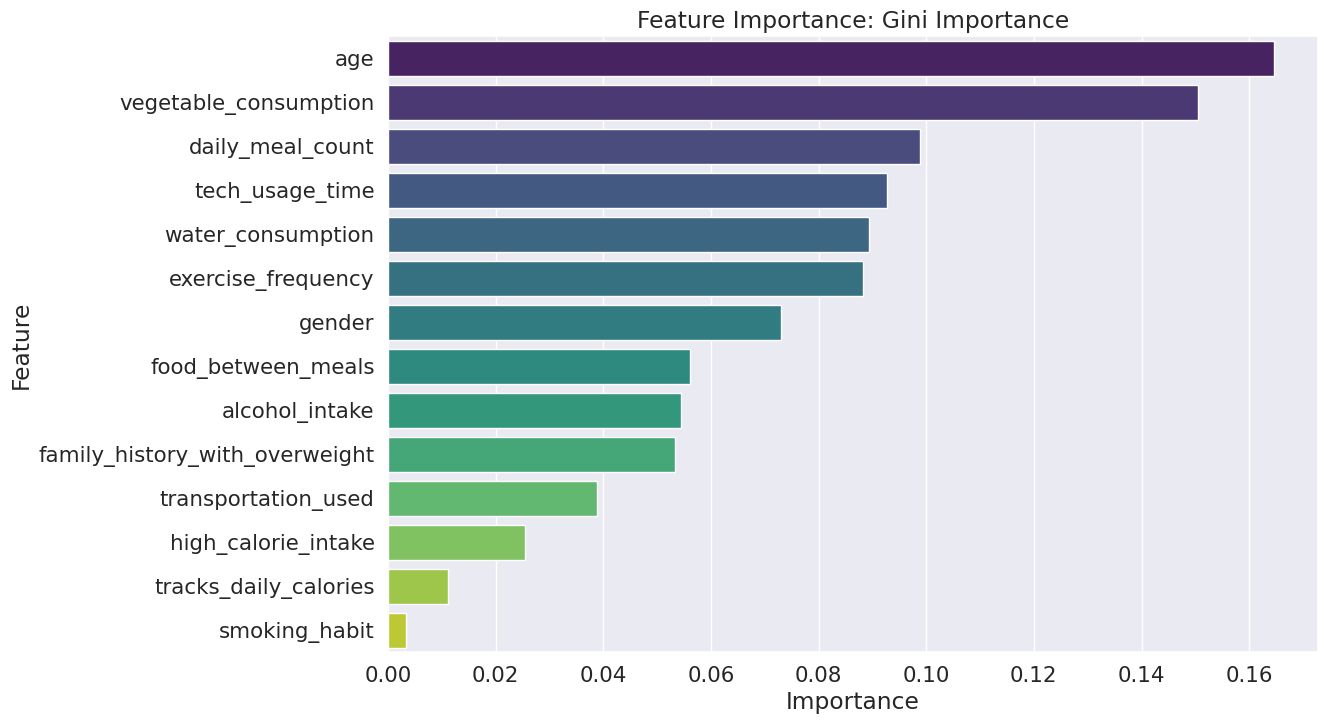

In [29]:
# Define feature importance variables
feature_names = X.columns
importances = rf_random.best_estimator_.feature_importances_

# Create a feature importance plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature',palette='viridis')
plt.title("Feature Importance: Gini Importance")
plt.show()